In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Load data
file_path = r'D:\Khai phá dữ liệu trong doanh nghiệp - DS317\Code\Raw\updated_student_data.csv'
data = pd.read_csv(file_path)

In [2]:

# Step 1: Replace -1 with NaN
data_cleaned = data.replace(-1, None)

In [3]:
# Save the processed data to a CSV file
processed_file_path = r'D:\Khai phá dữ liệu trong doanh nghiệp - DS317\Code\updated_student_data_raw.csv'
data_cleaned.to_csv(processed_file_path, index=False)

In [4]:

from sklearn.impute import SimpleImputer

# Step 2: Normalize columns drl_hk1 to drl_hk10 (clamp values to [0, 100])
drl_columns = [col for col in data_cleaned.columns if 'drl_hk' in col]
for column in drl_columns:
    data_cleaned[column] = data_cleaned[column].apply(lambda x: max(0, min(100, x)) if pd.notnull(x) else x)

# Step 3: Normalize columns dtb_hk1 to dtb_hk10 (clamp values to [0, 10])
dtb_columns = [col for col in data_cleaned.columns if 'dtb_hk' in col]
for column in dtb_columns:
    data_cleaned[column] = data_cleaned[column].apply(lambda x: max(0, min(10, x)) if pd.notnull(x) else x)

# Step 4: Normalize columns sotc_hk1 to sotc_hk10 (clamp values to [0, 24])
sotc_columns = [col for col in data_cleaned.columns if 'sotc_hk' in col]
for column in sotc_columns:
    data_cleaned[column] = data_cleaned[column].apply(lambda x: max(0, min(24, x)) if pd.notnull(x) else x)

# Step 5: Fill NaN values with median, except specific columns
exclude_columns = ['xeploai', 'soquyetdinh', 'ngaycapvb']
numeric_columns = data_cleaned.select_dtypes(include=['number']).columns
columns_to_impute = [col for col in numeric_columns if col not in exclude_columns]
imputer = SimpleImputer(strategy='median')
data_cleaned[columns_to_impute] = imputer.fit_transform(data_cleaned[columns_to_impute])


In [5]:
# Save the processed data to a CSV file
processed_file_path = r'D:\Khai phá dữ liệu trong doanh nghiệp - DS317\Code\updated_student_data_new.csv'
data_cleaned.to_csv(processed_file_path, index=False)

In [6]:
data = data_cleaned 

In [7]:
data.head(10)

,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,diachi_tinhtp,...,sotc_hk4,sotc_hk5,sotc_hk6,sotc_hk7,sotc_hk8,sotc_hk9,sotc_hk10,sotc_daura,hocky_thu,label
0,A6066FB1XPvAibaEXe8ydgsBCmjqAwCLOP/9AoDk,1995.0,Nam,Phú Yên,KTPM0001,CNPM,CQUI,2013.0,D480103,Tỉnh Phú Yên,...,15.0,14.0,24.0,23.0,18.0,24.0,12.0,136.0,9,0.0
1,1D5EC289XPvAibaEXe+1P/4gNbgreeJ2VIlZrW72,1995.0,Nam,Lâm Đồng,MMTT2013,MMT&TT,CQUI,2013.0,D480102,Tỉnh Lâm Đồng,...,16.0,18.0,18.0,16.0,14.0,12.0,12.0,121.0,4,1.0
2,C6FDC4ACXPvAibaEXe8jolcsAIssTEE3N5g9BgT7,1995.0,Nam,TP. Hồ Chí Minh,HTTT2013,HTTT,CQUI,2013.0,D480104,Quận Thủ Đức,...,20.0,18.0,18.0,16.0,14.0,12.0,12.0,140.0,1,1.0
3,C6D87955XPvAibaEXe8ooYk4mkUGmC0EOMKX8NpL,1994.0,Nam,Đắk Lắk,KTMT0001,KTMT,CQUI,2013.0,D520214,Tỉnh Đắk Lắk,...,21.0,20.0,16.0,20.0,21.0,13.0,13.0,156.0,10,0.0
4,E997D336XPvAibaEXe+cD1fKElqxL3Gg+IEXlrlL,1995.0,Nam,Bình Thuận,CNTT2013,KTTT,CQUI,2013.0,D480201,Huyện Tánh Linh,...,24.0,24.0,18.0,16.0,14.0,12.0,12.0,125.0,5,1.0
5,1D20ED25XPvAibaEXe8wlx2/dthDAqWOPv1DTtL1,1994.0,Nam,Đồng Tháp,HTTT2013,HTTT,CQUI,2013.0,D480104,Tỉnh Đồng Tháp,...,24.0,24.0,4.0,24.0,21.0,3.0,21.0,140.0,10,0.0
6,E99E9EA2XPvAibaEXe+LLvbxzunmJFOIkyW9ng8u,1995.0,Nam,Quảng Ngãi,ANTN2013,MMT&TT,KSTN,2013.0,D480299,Tỉnh Quảng Ngãi,...,18.0,18.0,14.0,3.0,15.0,16.0,12.0,121.0,9,0.0
7,72BA0955XPvAibaEXe+5oCRQPDKXsjOZ+8Ge9FSz,1995.0,Nam,Bình Thuận,MMTT0001,MMT&TT,CQUI,2013.0,D480102,Tỉnh Đồng Nai,...,19.0,19.0,7.0,18.0,18.0,19.0,11.0,121.0,10,0.0
8,C6AAE126XPvAibaEXe/FWKstHRRDnf0u81vfcV3u,1995.0,Nữ,An Giang,HTTT0001,HTTT,CQUI,2013.0,D52480104,Tỉnh An Giang,...,22.0,7.0,13.0,24.0,24.0,14.0,7.0,140.0,10,0.0
9,A51D3E41XPvAibaEXe/uH+ehSKMSjcnvclj+jKaO,1995.0,Nam,TP. Hồ Chí Minh,ANTN2013,MMT&TT,KSTN,2013.0,D480299,Thành phố Hồ Chí Minh,...,21.0,18.0,18.0,16.0,14.0,12.0,12.0,121.0,4,1.0


In [8]:
data.columns

Index(['mssv', 'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt',
       'khoahoc', 'chuyennganh2', 'diachi_tinhtp', 'xeploai', 'soquyetdinh',
       'ngaycapvb', 'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5',
       'drl_hk6', 'drl_hk7', 'drl_hk8', 'drl_hk9', 'drl_hk10', 'diemrl_TB',
       'dtb_hk1', 'dtb_hk2', 'dtb_hk3', 'dtb_hk4', 'dtb_hk5', 'dtb_hk6',
       'dtb_hk7', 'dtb_hk8', 'dtb_hk9', 'dtb_hk10', 'chungchi_av',
       'dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy', 'sotc_hk1', 'sotc_hk2',
       'sotc_hk3', 'sotc_hk4', 'sotc_hk5', 'sotc_hk6', 'sotc_hk7', 'sotc_hk8',
       'sotc_hk9', 'sotc_hk10', 'sotc_daura', 'hocky_thu', 'label'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssv           8231 non-null   object 
 1   namsinh        8231 non-null   float64
 2   gioitinh       8231 non-null   object 
 3   noisinh        8231 non-null   object 
 4   lopsh          8231 non-null   object 
 5   khoa           8231 non-null   object 
 6   hedt           8231 non-null   object 
 7   khoahoc        8231 non-null   float64
 8   chuyennganh2   8231 non-null   object 
 9   diachi_tinhtp  8231 non-null   object 
 10  xeploai        1831 non-null   object 
 11  soquyetdinh    1831 non-null   object 
 12  ngaycapvb      1831 non-null   object 
 13  drl_hk1        8231 non-null   float64
 14  drl_hk2        8231 non-null   float64
 15  drl_hk3        8231 non-null   float64
 16  drl_hk4        8231 non-null   float64
 17  drl_hk5        8231 non-null   float64
 18  drl_hk6 

# TÍNH ĐẦY ĐỦ

In [10]:
# Hàm kiểm tra và đánh giá tính đầy đủ
def evaluate_completeness(dataframe, columns):
    print("Đánh giá tính đầy đủ:")
    for column in columns:
        missing_values = dataframe[column].isnull().sum()  # Số lượng giá trị bị thiếu
        total_values = len(dataframe)  # Tổng số giá trị
        complete_percentage = ((total_values - missing_values) / total_values) * 100  # Tỷ lệ đầy đủ
        print(f"Cột '{column}': Số lượng đầy đủ = {total_values - missing_values}, Tỷ lệ đầy đủ = {complete_percentage:.2f}%")

In [11]:
# Đánh giá trước khi xử lý
print("Trước khi xử lý:")
evaluate_completeness(data, data.columns)

Trước khi xử lý:
Đánh giá tính đầy đủ:
Cột 'mssv': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'namsinh': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'gioitinh': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'noisinh': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'lopsh': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'khoa': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'hedt': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'khoahoc': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'chuyennganh2': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'diachi_tinhtp': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'xeploai': Số lượng đầy đủ = 1831, Tỷ lệ đầy đủ = 22.25%
Cột 'soquyetdinh': Số lượng đầy đủ = 1831, Tỷ lệ đầy đủ = 22.25%
Cột 'ngaycapvb': Số lượng đầy đủ = 1831, Tỷ lệ đầy đủ = 22.25%
Cột 'drl_hk1': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'drl_hk2': Số lượng đầy đủ = 8231, Tỷ lệ đầy đủ = 100.00%
Cột 'drl_hk3': Số lượng đầy

In [12]:
# Kiểm tra tính đầy đủ cho tất cả các cột trong DataFrame
missing_values = data.isnull().sum()  # Tính số lượng giá trị bị thiếu ở mỗi cột
missing_percentage = (missing_values / len(data)) * 100  # Tính tỷ lệ phần trăm giá trị bị thiếu

# In kết quả
print("Số lượng giá trị bị thiếu trong các cột:")
print(missing_values)

print("\nTỷ lệ phần trăm giá trị bị thiếu trong các cột:")
print(missing_percentage)

# In ra những cột có giá trị bị thiếu
columns_with_missing_values = missing_values[missing_values > 0]
print("\nCác cột có giá trị bị thiếu:")
print(columns_with_missing_values)

Số lượng giá trị bị thiếu trong các cột:
mssv                0
namsinh             0
gioitinh            0
noisinh             0
lopsh               0
khoa                0
hedt                0
khoahoc             0
chuyennganh2        0
diachi_tinhtp       0
xeploai          6400
soquyetdinh      6400
ngaycapvb        6400
drl_hk1             0
drl_hk2             0
drl_hk3             0
drl_hk4             0
drl_hk5             0
drl_hk6             0
drl_hk7             0
drl_hk8             0
drl_hk9             0
drl_hk10            0
diemrl_TB        6320
dtb_hk1             0
dtb_hk2             0
dtb_hk3             0
dtb_hk4             0
dtb_hk5             0
dtb_hk6             0
dtb_hk7             0
dtb_hk8             0
dtb_hk9             0
dtb_hk10            0
chungchi_av         0
dtb_toankhoa        0
dtb_tichluy         0
sotc_tichluy        0
sotc_hk1            0
sotc_hk2            0
sotc_hk3            0
sotc_hk4            0
sotc_hk5            0
sotc_hk6     

# ** TÍNH CHÍNH XÁC **

In [13]:
data.describe()

,namsinh,khoahoc,drl_hk1,drl_hk2,drl_hk3,drl_hk4,drl_hk5,drl_hk6,drl_hk7,drl_hk8,...,sotc_hk3,sotc_hk4,sotc_hk5,sotc_hk6,sotc_hk7,sotc_hk8,sotc_hk9,sotc_hk10,sotc_daura,label
count,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,...,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000
mean,1998.261815,2016.385980,75.835378,76.747054,76.636375,76.722269,76.887377,77.783623,77.853359,77.899891,...,17.980561,19.222816,17.152108,17.240311,15.755801,13.445268,11.984328,11.955412,128.953347,0.367149
std,2.156817,2.046089,6.983699,6.549108,8.080598,6.685789,6.174346,5.856274,5.659002,5.512512,...,6.275324,3.716492,5.122219,4.271393,4.730362,4.759554,4.097134,3.261220,10.535873,0.482057
min,1985.000000,2013.000000,0.000000,13.000000,0.000000,0.000000,12.000000,13.000000,13.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,0.000000
25%,1996.000000,2015.000000,76.000000,77.000000,77.000000,77.000000,77.000000,78.000000,78.000000,78.000000,...,17.000000,17.000000,16.000000,16.000000,14.000000,11.000000,12.000000,12.000000,121.000000,0.000000
50%,1999.000000,2017.000000,76.000000,77.000000,77.000000,77.000000,77.000000,78.000000,78.000000,78.000000,...,20.000000,20.000000,18.000000,18.000000,16.000000,14.000000,12.000000,12.000000,125.000000,0.000000
75%,2000.000000,2018.000000,76.000000,77.000000,77.000000,77.000000,77.000000,78.000000,78.000000,78.000000,...,22.000000,22.000000,20.000000,20.000000,19.000000,15.000000,12.000000,12.000000,136.000000,1.000000
max,2001.000000,2019.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,156.000000,1.000000


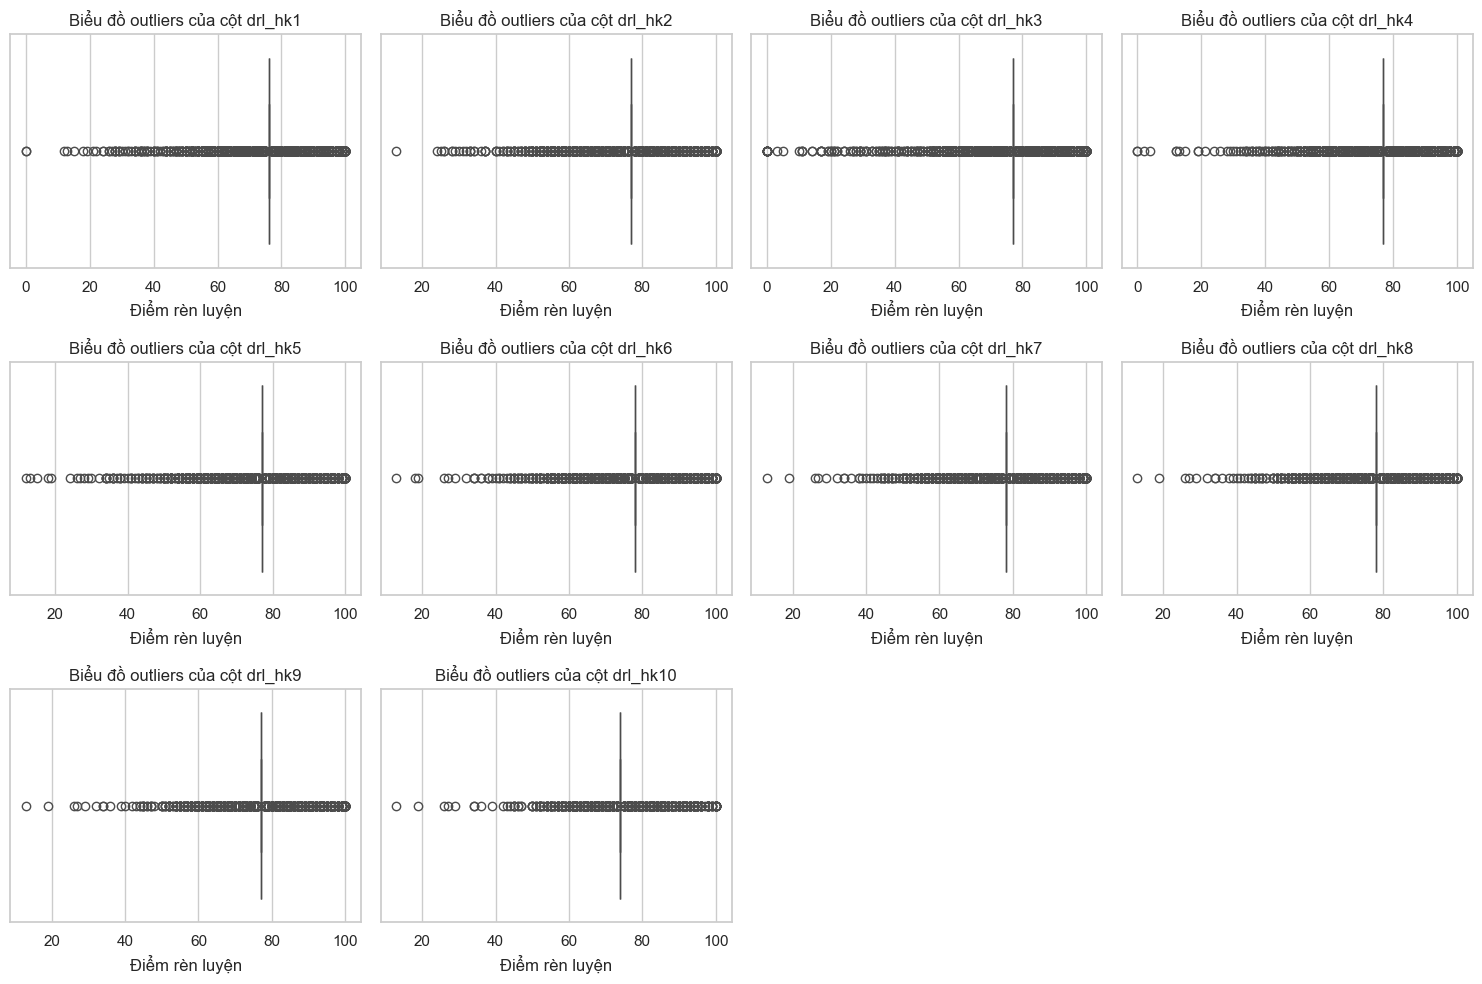

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Các cột cần vẽ boxplot
columns_to_plot = ['drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5', 
                  'drl_hk6', 'drl_hk7', 'drl_hk8', 'drl_hk9', 'drl_hk10']

# Tạo đồ thị cho mỗi cột
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 4, i)  # Chia đồ thị thành 3 hàng và 4 cột
    sns.boxplot(data=data, x=column)
    plt.title(f'Biểu đồ outliers của cột {column}')
    plt.xlabel('Điểm rèn luyện')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


1. Tỷ lệ chính xác
2. Tính hợp lệ có thể tham khảo ở đây

In [15]:
# Hàm tính tỷ lệ chính xác
def calculate_accuracy(data, column, condition):
    total_values = len(data)
    valid_values = data[column].apply(condition).sum()
    accuracy = (valid_values / total_values) * 100
    return accuracy

In [16]:
# Tính tỷ lệ chính xác cho các cột điểm học kỳ (drl_hk1 đến drl_hk10)
columns_to_check = ['drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5', 'drl_hk6', 'drl_hk7', 'drl_hk8', 'drl_hk9', 'drl_hk10']

for column in columns_to_check:
    accuracy = calculate_accuracy(data, column, lambda x: 0 <= x <= 100)  # Kiểm tra xem điểm có nằm trong khoảng từ 0 đến 100 không
    print(f"Tỷ lệ chính xác của cột {column} là: {accuracy:.2f}%")

Tỷ lệ chính xác của cột drl_hk1 là: 100.00%
Tỷ lệ chính xác của cột drl_hk2 là: 100.00%
Tỷ lệ chính xác của cột drl_hk3 là: 100.00%
Tỷ lệ chính xác của cột drl_hk4 là: 100.00%
Tỷ lệ chính xác của cột drl_hk5 là: 100.00%
Tỷ lệ chính xác của cột drl_hk6 là: 100.00%
Tỷ lệ chính xác của cột drl_hk7 là: 100.00%
Tỷ lệ chính xác của cột drl_hk8 là: 100.00%
Tỷ lệ chính xác của cột drl_hk9 là: 100.00%
Tỷ lệ chính xác của cột drl_hk10 là: 100.00%


In [17]:
# Hàm tính tỷ lệ chính xác
def calculate_accuracy(data, column, condition):
    total_values = len(data)
    valid_values = data[column].apply(condition).sum()
    accuracy = (valid_values / total_values) * 100
    return accuracy

# Lặp qua các cột từ drl_hk1 đến drl_hk10
for i in range(1, 11):  # 10 học kỳ
    column_name = f'drl_hk{i}'  # Tạo tên cột
    # Đo lường tính chính xác trước khi xử lý
    accuracy_before = calculate_accuracy(data, column_name, lambda x: 0 <= x <= 100)
    print(f"Tính chính xác trước khi xử lý cho {column_name}: {accuracy_before:.2f}%")
    
    # Lưu bản sao dữ liệu gốc
    original_drl = data[column_name].copy()
    
    # Thay đổi giá trị nhỏ hơn 0 thành 0 và lớn hơn 100 thành 100
    data[column_name] = data[column_name].apply(lambda x: max(0, min(100, x)))
    
    # Tính số dòng đã thay đổi
    num_changed_rows = (data[column_name] != original_drl).sum()
    
    # In ra kết quả
    print(f"Số dòng đã thay đổi cho {column_name}: {num_changed_rows}")
    
    # Đo lường tính chính xác sau khi xử lý
    accuracy_after = calculate_accuracy(data, column_name, lambda x: 0 <= x <= 100)
    print(f"Tính chính xác sau khi xử lý cho {column_name}: {accuracy_after:.2f}%")


Tính chính xác trước khi xử lý cho drl_hk1: 100.00%
Số dòng đã thay đổi cho drl_hk1: 0
Tính chính xác sau khi xử lý cho drl_hk1: 100.00%
Tính chính xác trước khi xử lý cho drl_hk2: 100.00%
Số dòng đã thay đổi cho drl_hk2: 0
Tính chính xác sau khi xử lý cho drl_hk2: 100.00%
Tính chính xác trước khi xử lý cho drl_hk3: 100.00%
Số dòng đã thay đổi cho drl_hk3: 0
Tính chính xác sau khi xử lý cho drl_hk3: 100.00%
Tính chính xác trước khi xử lý cho drl_hk4: 100.00%
Số dòng đã thay đổi cho drl_hk4: 0
Tính chính xác sau khi xử lý cho drl_hk4: 100.00%
Tính chính xác trước khi xử lý cho drl_hk5: 100.00%
Số dòng đã thay đổi cho drl_hk5: 0
Tính chính xác sau khi xử lý cho drl_hk5: 100.00%
Tính chính xác trước khi xử lý cho drl_hk6: 100.00%
Số dòng đã thay đổi cho drl_hk6: 0
Tính chính xác sau khi xử lý cho drl_hk6: 100.00%
Tính chính xác trước khi xử lý cho drl_hk7: 100.00%
Số dòng đã thay đổi cho drl_hk7: 0
Tính chính xác sau khi xử lý cho drl_hk7: 100.00%
Tính chính xác trước khi xử lý cho drl_hk

In [18]:
# Lặp qua các cột từ dtb_hk1 đến dtb_hk10
for i in range(1, 11):  # 10 học kỳ
    column_name = f'dtb_hk{i}'  # Tạo tên cột
    # Đo lường tính chính xác trước khi xử lý
    accuracy_before = calculate_accuracy(data, column_name, lambda x: 0 <= x <= 10)  # Giả sử điểm nằm trong khoảng từ 0 đến 10
    print(f"Tính chính xác trước khi xử lý cho {column_name}: {accuracy_before:.2f}%")
    
    # Lưu bản sao dữ liệu gốc
    original_dtb = data[column_name].copy()
    
    # Thay đổi giá trị nhỏ hơn 0 thành 0 và lớn hơn 10 thành 10
    data[column_name] = data[column_name].apply(lambda x: max(0, min(10, x)))  # Giả sử điểm nằm trong khoảng 0 đến 10
    
    # Tính số dòng đã thay đổi
    num_changed_rows = (data[column_name] != original_dtb).sum()
    
    # In ra kết quả
    print(f"Số dòng đã thay đổi cho {column_name}: {num_changed_rows}")
    
    # Đo lường tính chính xác sau khi xử lý
    accuracy_after = calculate_accuracy(data, column_name, lambda x: 0 <= x <= 10)  # Giả sử điểm nằm trong khoảng từ 0 đến 10
    print(f"Tính chính xác sau khi xử lý cho {column_name}: {accuracy_after:.2f}%")

Tính chính xác trước khi xử lý cho dtb_hk1: 100.00%
Số dòng đã thay đổi cho dtb_hk1: 0
Tính chính xác sau khi xử lý cho dtb_hk1: 100.00%
Tính chính xác trước khi xử lý cho dtb_hk2: 100.00%
Số dòng đã thay đổi cho dtb_hk2: 0
Tính chính xác sau khi xử lý cho dtb_hk2: 100.00%
Tính chính xác trước khi xử lý cho dtb_hk3: 100.00%
Số dòng đã thay đổi cho dtb_hk3: 0
Tính chính xác sau khi xử lý cho dtb_hk3: 100.00%
Tính chính xác trước khi xử lý cho dtb_hk4: 100.00%
Số dòng đã thay đổi cho dtb_hk4: 0
Tính chính xác sau khi xử lý cho dtb_hk4: 100.00%
Tính chính xác trước khi xử lý cho dtb_hk5: 100.00%
Số dòng đã thay đổi cho dtb_hk5: 0
Tính chính xác sau khi xử lý cho dtb_hk5: 100.00%
Tính chính xác trước khi xử lý cho dtb_hk6: 100.00%
Số dòng đã thay đổi cho dtb_hk6: 0
Tính chính xác sau khi xử lý cho dtb_hk6: 100.00%
Tính chính xác trước khi xử lý cho dtb_hk7: 100.00%
Số dòng đã thay đổi cho dtb_hk7: 0
Tính chính xác sau khi xử lý cho dtb_hk7: 100.00%
Tính chính xác trước khi xử lý cho dtb_hk

In [19]:
# Lặp qua các cột từ sotc_hk1 đến sotc_hk10
for i in range(1, 11):  # 10 học kỳ
    column_name = f'sotc_hk{i}'  # Tạo tên cột
    # Đo lường tính chính xác trước khi xử lý
    accuracy_before = calculate_accuracy(data, column_name, lambda x: 0 <= x <= 24)  # Điều kiện: 0 <= sotc <= 24
    print(f"Tính chính xác trước khi xử lý cho {column_name}: {accuracy_before:.2f}%")
    
    # Lưu bản sao dữ liệu gốc
    original_sotc = data[column_name].copy()
    
    # Thay đổi giá trị nhỏ hơn 0 thành 0 và lớn hơn 24 thành 24
    data[column_name] = data[column_name].apply(lambda x: max(0, min(24, x)))  # Đảm bảo giá trị nằm trong khoảng 0 đến 24
    
    # Tính số dòng đã thay đổi
    num_changed_rows = (data[column_name] != original_sotc).sum()
    
    # In ra kết quả
    print(f"Số dòng đã thay đổi cho {column_name}: {num_changed_rows}")
    
    # Đo lường tính chính xác sau khi xử lý
    accuracy_after = calculate_accuracy(data, column_name, lambda x: 0 <= x <= 24)  # Điều kiện: 0 <= sotc <= 24
    print(f"Tính chính xác sau khi xử lý cho {column_name}: {accuracy_after:.2f}%")

Tính chính xác trước khi xử lý cho sotc_hk1: 100.00%
Số dòng đã thay đổi cho sotc_hk1: 0
Tính chính xác sau khi xử lý cho sotc_hk1: 100.00%
Tính chính xác trước khi xử lý cho sotc_hk2: 100.00%
Số dòng đã thay đổi cho sotc_hk2: 0
Tính chính xác sau khi xử lý cho sotc_hk2: 100.00%
Tính chính xác trước khi xử lý cho sotc_hk3: 100.00%
Số dòng đã thay đổi cho sotc_hk3: 0
Tính chính xác sau khi xử lý cho sotc_hk3: 100.00%
Tính chính xác trước khi xử lý cho sotc_hk4: 100.00%
Số dòng đã thay đổi cho sotc_hk4: 0
Tính chính xác sau khi xử lý cho sotc_hk4: 100.00%
Tính chính xác trước khi xử lý cho sotc_hk5: 100.00%
Số dòng đã thay đổi cho sotc_hk5: 0
Tính chính xác sau khi xử lý cho sotc_hk5: 100.00%
Tính chính xác trước khi xử lý cho sotc_hk6: 100.00%
Số dòng đã thay đổi cho sotc_hk6: 0
Tính chính xác sau khi xử lý cho sotc_hk6: 100.00%
Tính chính xác trước khi xử lý cho sotc_hk7: 100.00%
Số dòng đã thay đổi cho sotc_hk7: 0
Tính chính xác sau khi xử lý cho sotc_hk7: 100.00%
Tính chính xác trước

In [20]:
# Hàm kiểm tra và sửa giá trị của cột dtb_tichluy và dtb_toankhoa
def validate_dtb(row):
    # Kiểm tra và sửa các giá trị của dtb_tichluy và dtb_toankhoa
    row['dtb_tichluy'] = max(0, min(10, row['dtb_tichluy']))
    row['dtb_toankhoa'] = max(0, min(10, row['dtb_toankhoa']))
    return row

# Đo lường tính chính xác trước khi xử lý
accuracy_dtb_tichluy_before = calculate_accuracy(data, 'dtb_tichluy', lambda x: 0 <= x <= 10)
accuracy_dtb_toankhoa_before = calculate_accuracy(data, 'dtb_toankhoa', lambda x: 0 <= x <= 10)

# In ra kết quả tính chính xác trước khi xử lý
print(f"Tính chính xác của dtb_tichluy trước khi xử lý: {accuracy_dtb_tichluy_before:.2f}%")
print(f"Tính chính xác của dtb_toankhoa trước khi xử lý: {accuracy_dtb_toankhoa_before:.2f}%")

# Tiến hành sửa giá trị sau khi đo lường chính xác
data = data.apply(validate_dtb, axis=1)

# Đo lường tính chính xác sau khi xử lý
accuracy_dtb_tichluy_after = calculate_accuracy(data, 'dtb_tichluy', lambda x: 0 <= x <= 10)
accuracy_dtb_toankhoa_after = calculate_accuracy(data, 'dtb_toankhoa', lambda x: 0 <= x <= 10)

# In ra kết quả tính chính xác sau khi xử lý
print(f"Tính chính xác của dtb_tichluy sau khi xử lý: {accuracy_dtb_tichluy_after:.2f}%")
print(f"Tính chính xác của dtb_toankhoa sau khi xử lý: {accuracy_dtb_toankhoa_after:.2f}%")

Tính chính xác của dtb_tichluy trước khi xử lý: 100.00%
Tính chính xác của dtb_toankhoa trước khi xử lý: 100.00%
Tính chính xác của dtb_tichluy sau khi xử lý: 100.00%
Tính chính xác của dtb_toankhoa sau khi xử lý: 100.00%


3. Độ đo IQR

In [21]:
# Hàm tính IQR và tỷ lệ ngoại lai cho từng cột
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Phân vị thứ nhất
    Q3 = data[column].quantile(0.75)  # Phân vị thứ ba
    IQR = Q3 - Q1  # Khoảng tứ phân vị

    # Xác định ngoại lai
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]

    # Tính tỷ lệ giá trị ngoại lai
    num_outliers = len(outliers)  # Số lượng giá trị ngoại lai
    total_values = len(data)  # Tổng số giá trị
    outlier_percentage = (num_outliers / total_values) * 100  # Tỷ lệ %

    return num_outliers, outlier_percentage

# Danh sách các cột cần kiểm tra
columns_to_check = [
    'dtb_hk1', 'dtb_hk2', 'dtb_hk3', 'dtb_hk4', 'dtb_hk5', 'dtb_hk6',
    'dtb_hk7', 'dtb_hk8', 'dtb_hk9', 'dtb_hk10'
]

# Tính toán ngoại lai và tỷ lệ cho mỗi cột
for column in columns_to_check:
    num_outliers, outlier_percentage = calculate_outliers(data, column)
    print(f"Số lượng giá trị ngoại lai trong cột {column}: {num_outliers}")
    print(f"Tỷ lệ giá trị ngoại lai trong cột {column}: {outlier_percentage:.2f}%")


Số lượng giá trị ngoại lai trong cột dtb_hk1: 352
Tỷ lệ giá trị ngoại lai trong cột dtb_hk1: 4.28%
Số lượng giá trị ngoại lai trong cột dtb_hk2: 462
Tỷ lệ giá trị ngoại lai trong cột dtb_hk2: 5.61%
Số lượng giá trị ngoại lai trong cột dtb_hk3: 589
Tỷ lệ giá trị ngoại lai trong cột dtb_hk3: 7.16%
Số lượng giá trị ngoại lai trong cột dtb_hk4: 546
Tỷ lệ giá trị ngoại lai trong cột dtb_hk4: 6.63%
Số lượng giá trị ngoại lai trong cột dtb_hk5: 607
Tỷ lệ giá trị ngoại lai trong cột dtb_hk5: 7.37%
Số lượng giá trị ngoại lai trong cột dtb_hk6: 642
Tỷ lệ giá trị ngoại lai trong cột dtb_hk6: 7.80%
Số lượng giá trị ngoại lai trong cột dtb_hk7: 660
Tỷ lệ giá trị ngoại lai trong cột dtb_hk7: 8.02%
Số lượng giá trị ngoại lai trong cột dtb_hk8: 1129
Tỷ lệ giá trị ngoại lai trong cột dtb_hk8: 13.72%
Số lượng giá trị ngoại lai trong cột dtb_hk9: 3846
Tỷ lệ giá trị ngoại lai trong cột dtb_hk9: 46.73%
Số lượng giá trị ngoại lai trong cột dtb_hk10: 2209
Tỷ lệ giá trị ngoại lai trong cột dtb_hk10: 26.84%


In [22]:
# Hàm tính IQR và tỷ lệ ngoại lai cho từng cột
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Phân vị thứ nhất
    Q3 = data[column].quantile(0.75)  # Phân vị thứ ba
    IQR = Q3 - Q1  # Khoảng tứ phân vị

    # Xác định ngoại lai
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]

    # Tính tỷ lệ giá trị ngoại lai
    num_outliers = len(outliers)  # Số lượng giá trị ngoại lai
    total_values = len(data)  # Tổng số giá trị
    outlier_percentage = (num_outliers / total_values) * 100  # Tỷ lệ %

    return num_outliers, outlier_percentage

# Danh sách các cột cần kiểm tra
columns_to_check = [
    'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5', 'drl_hk6',
    'drl_hk7', 'drl_hk8', 'drl_hk9', 'drl_hk10'
]

# Tính toán ngoại lai và tỷ lệ cho mỗi cột
for column in columns_to_check:
    num_outliers, outlier_percentage = calculate_outliers(data, column)
    print(f"Số lượng giá trị ngoại lai trong cột {column}: {num_outliers}")
    print(f"Tỷ lệ giá trị ngoại lai trong cột {column}: {outlier_percentage:.2f}%")


Số lượng giá trị ngoại lai trong cột drl_hk1: 1853
Tỷ lệ giá trị ngoại lai trong cột drl_hk1: 22.51%
Số lượng giá trị ngoại lai trong cột drl_hk2: 1820
Tỷ lệ giá trị ngoại lai trong cột drl_hk2: 22.11%
Số lượng giá trị ngoại lai trong cột drl_hk3: 1786
Tỷ lệ giá trị ngoại lai trong cột drl_hk3: 21.70%
Số lượng giá trị ngoại lai trong cột drl_hk4: 1738
Tỷ lệ giá trị ngoại lai trong cột drl_hk4: 21.12%
Số lượng giá trị ngoại lai trong cột drl_hk5: 1696
Tỷ lệ giá trị ngoại lai trong cột drl_hk5: 20.61%
Số lượng giá trị ngoại lai trong cột drl_hk6: 1641
Tỷ lệ giá trị ngoại lai trong cột drl_hk6: 19.94%
Số lượng giá trị ngoại lai trong cột drl_hk7: 1596
Tỷ lệ giá trị ngoại lai trong cột drl_hk7: 19.39%
Số lượng giá trị ngoại lai trong cột drl_hk8: 1547
Tỷ lệ giá trị ngoại lai trong cột drl_hk8: 18.79%
Số lượng giá trị ngoại lai trong cột drl_hk9: 1365
Tỷ lệ giá trị ngoại lai trong cột drl_hk9: 16.58%
Số lượng giá trị ngoại lai trong cột drl_hk10: 878
Tỷ lệ giá trị ngoại lai trong cột drl_hk

In [23]:
# Hàm tính IQR và tỷ lệ ngoại lai
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Phân vị thứ nhất
    Q3 = df[column].quantile(0.75)  # Phân vị thứ ba
    IQR = Q3 - Q1  # Khoảng tứ phân vị

    # Xác định ngoại lai
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

    # Tính tỷ lệ ngoại lai
    num_outliers = len(outliers)  # Số lượng giá trị ngoại lai
    total_values = len(df)  # Tổng số giá trị
    outlier_percentage = (num_outliers / total_values) * 100  # Tỷ lệ %

    return num_outliers, outlier_percentage

# Các cột cần tính toán IQR
columns_to_check = ['dtb_tichluy', 'dtb_toankhoa', 'sotc_tichluy', 'label']

# Tính toán ngoại lai và tỷ lệ cho mỗi cột
for column in columns_to_check:
    num_outliers, outlier_percentage = calculate_outliers(data, column)
    print(f"Số lượng giá trị ngoại lai trong cột {column}: {num_outliers}")
    print(f"Tỷ lệ giá trị ngoại lai trong cột {column}: {outlier_percentage:.2f}%")

Số lượng giá trị ngoại lai trong cột dtb_tichluy: 253
Tỷ lệ giá trị ngoại lai trong cột dtb_tichluy: 3.07%
Số lượng giá trị ngoại lai trong cột dtb_toankhoa: 903
Tỷ lệ giá trị ngoại lai trong cột dtb_toankhoa: 10.97%
Số lượng giá trị ngoại lai trong cột sotc_tichluy: 775
Tỷ lệ giá trị ngoại lai trong cột sotc_tichluy: 9.42%
Số lượng giá trị ngoại lai trong cột label: 0
Tỷ lệ giá trị ngoại lai trong cột label: 0.00%


In [24]:
# Hàm tính tỷ lệ chính xác và xử lý giá trị
def calculate_accuracy(data, column, condition):
    total_values = len(data)
    valid_values = data[column].apply(condition).sum()
    accuracy = (valid_values / total_values) * 100
    return accuracy

# Hàm tính IQR và tỷ lệ ngoại lai
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    num_outliers = len(outliers)
    total_values = len(data)
    outlier_percentage = (num_outliers / total_values) * 100
    return num_outliers, outlier_percentage

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['sotc_hk1', 'sotc_hk2', 'sotc_hk3', 'sotc_hk4', 'sotc_hk5',
                    'sotc_hk6', 'sotc_hk7', 'sotc_hk8', 'sotc_hk9', 'sotc_hk10',
                    'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5',
                    'drl_hk6', 'drl_hk7', 'drl_hk8', 'drl_hk9', 'drl_hk10',
                    'dtb_hk1', 'dtb_hk2', 'dtb_hk3', 'dtb_hk4', 'dtb_hk5',
                    'dtb_hk6', 'dtb_hk7', 'dtb_hk8', 'dtb_hk9', 'dtb_hk10']

for column in columns_to_scale:
    if column in data.columns:
        data[column] = scaler.fit_transform(data[[column]])
        print(f"Cột '{column}' đã được chuẩn hóa.")

Cột 'sotc_hk1' đã được chuẩn hóa.
Cột 'sotc_hk2' đã được chuẩn hóa.
Cột 'sotc_hk3' đã được chuẩn hóa.
Cột 'sotc_hk4' đã được chuẩn hóa.
Cột 'sotc_hk5' đã được chuẩn hóa.
Cột 'sotc_hk6' đã được chuẩn hóa.
Cột 'sotc_hk7' đã được chuẩn hóa.
Cột 'sotc_hk8' đã được chuẩn hóa.
Cột 'sotc_hk9' đã được chuẩn hóa.
Cột 'sotc_hk10' đã được chuẩn hóa.
Cột 'drl_hk1' đã được chuẩn hóa.
Cột 'drl_hk2' đã được chuẩn hóa.
Cột 'drl_hk3' đã được chuẩn hóa.
Cột 'drl_hk4' đã được chuẩn hóa.
Cột 'drl_hk5' đã được chuẩn hóa.
Cột 'drl_hk6' đã được chuẩn hóa.
Cột 'drl_hk7' đã được chuẩn hóa.
Cột 'drl_hk8' đã được chuẩn hóa.
Cột 'drl_hk9' đã được chuẩn hóa.
Cột 'drl_hk10' đã được chuẩn hóa.
Cột 'dtb_hk1' đã được chuẩn hóa.
Cột 'dtb_hk2' đã được chuẩn hóa.
Cột 'dtb_hk3' đã được chuẩn hóa.
Cột 'dtb_hk4' đã được chuẩn hóa.
Cột 'dtb_hk5' đã được chuẩn hóa.
Cột 'dtb_hk6' đã được chuẩn hóa.
Cột 'dtb_hk7' đã được chuẩn hóa.
Cột 'dtb_hk8' đã được chuẩn hóa.
Cột 'dtb_hk9' đã được chuẩn hóa.
Cột 'dtb_hk10' đã được chuẩn hó

In [25]:
# Hàm kiểm tra độ chính xác
def evaluate_accuracy(dataframe):
    print("\nĐánh giá độ chính xác:")
    numerical_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        valid_values = dataframe[col].apply(lambda x: 0 <= x <= 100).sum()
        accuracy = (valid_values / len(dataframe)) * 100
        print(f"Cột '{col}' có độ chính xác: {accuracy:.2f}%")

In [26]:
evaluate_accuracy(data)


Đánh giá độ chính xác:
Cột 'namsinh' có độ chính xác: 0.00%
Cột 'khoahoc' có độ chính xác: 0.00%
Cột 'drl_hk1' có độ chính xác: 100.00%
Cột 'drl_hk2' có độ chính xác: 100.00%
Cột 'drl_hk3' có độ chính xác: 100.00%
Cột 'drl_hk4' có độ chính xác: 100.00%
Cột 'drl_hk5' có độ chính xác: 100.00%
Cột 'drl_hk6' có độ chính xác: 100.00%
Cột 'drl_hk7' có độ chính xác: 100.00%
Cột 'drl_hk8' có độ chính xác: 100.00%
Cột 'drl_hk9' có độ chính xác: 100.00%
Cột 'drl_hk10' có độ chính xác: 100.00%
Cột 'diemrl_TB' có độ chính xác: 23.19%
Cột 'dtb_hk1' có độ chính xác: 100.00%
Cột 'dtb_hk2' có độ chính xác: 100.00%
Cột 'dtb_hk3' có độ chính xác: 100.00%
Cột 'dtb_hk4' có độ chính xác: 100.00%
Cột 'dtb_hk5' có độ chính xác: 100.00%
Cột 'dtb_hk6' có độ chính xác: 100.00%
Cột 'dtb_hk7' có độ chính xác: 100.00%
Cột 'dtb_hk8' có độ chính xác: 100.00%
Cột 'dtb_hk9' có độ chính xác: 100.00%
Cột 'dtb_hk10' có độ chính xác: 100.00%
Cột 'chungchi_av' có độ chính xác: 100.00%
Cột 'dtb_toankhoa' có độ chính xác: 1

In [27]:

# Chạy kiểm tra ngoại lai cho các cột
columns_to_check = ['sotc_hk1', 'sotc_hk2', 'sotc_hk3', 'sotc_hk4', 'sotc_hk5',
                    'sotc_hk6', 'sotc_hk7', 'sotc_hk8', 'sotc_hk9', 'sotc_hk10',
                    'drl_hk1', 'drl_hk2', 'drl_hk3', 'drl_hk4', 'drl_hk5',
                    'drl_hk6', 'drl_hk7', 'drl_hk8', 'drl_hk9', 'drl_hk10',
                    'dtb_hk1', 'dtb_hk2', 'dtb_hk3', 'dtb_hk4', 'dtb_hk5',
                    'dtb_hk6', 'dtb_hk7', 'dtb_hk8', 'dtb_hk9', 'dtb_hk10',
                    'diemrl_TB', 'sotc_daura' ,'dtb_tichluy', 'dtb_toankhoa', 'sotc_tichluy', 'chungchi_av', 'diemrl_TB ', 'hocky_thu', 'label']

for column in columns_to_check:
    if column in data.columns:
        num_outliers, outlier_percentage = calculate_outliers(data, column)
        print(f"Cột '{column}' có số lượng giá trị ngoại lai: {num_outliers}, Tỷ lệ ngoại lai: {outlier_percentage:.2f}%")

Cột 'sotc_hk1' có số lượng giá trị ngoại lai: 348, Tỷ lệ ngoại lai: 4.23%
Cột 'sotc_hk2' có số lượng giá trị ngoại lai: 81, Tỷ lệ ngoại lai: 0.98%
Cột 'sotc_hk3' có số lượng giá trị ngoại lai: 1216, Tỷ lệ ngoại lai: 14.77%
Cột 'sotc_hk4' có số lượng giá trị ngoại lai: 281, Tỷ lệ ngoại lai: 3.41%
Cột 'sotc_hk5' có số lượng giá trị ngoại lai: 929, Tỷ lệ ngoại lai: 11.29%
Cột 'sotc_hk6' có số lượng giá trị ngoại lai: 597, Tỷ lệ ngoại lai: 7.25%
Cột 'sotc_hk7' có số lượng giá trị ngoại lai: 479, Tỷ lệ ngoại lai: 5.82%
Cột 'sotc_hk8' có số lượng giá trị ngoại lai: 988, Tỷ lệ ngoại lai: 12.00%
Cột 'sotc_hk9' có số lượng giá trị ngoại lai: 3701, Tỷ lệ ngoại lai: 44.96%
Cột 'sotc_hk10' có số lượng giá trị ngoại lai: 2132, Tỷ lệ ngoại lai: 25.90%
Cột 'drl_hk1' có số lượng giá trị ngoại lai: 1853, Tỷ lệ ngoại lai: 22.51%
Cột 'drl_hk2' có số lượng giá trị ngoại lai: 1820, Tỷ lệ ngoại lai: 22.11%
Cột 'drl_hk3' có số lượng giá trị ngoại lai: 1786, Tỷ lệ ngoại lai: 21.70%
Cột 'drl_hk4' có số lượng g

4. Z-score

In [28]:
from scipy.stats import zscore

# Các cột cần tính Z-score
columns_to_check_zscore = ['dtb_tichluy', 'dtb_toankhoa', 'sotc_tichluy'] + [f'drl_hk{i}' for i in range(1, 11)] + [f'sotc_hk{i}' for i in range(1, 11)]

# Tính Z-score cho mỗi cột
for column in columns_to_check_zscore:
    data[f'{column}_zscore'] = zscore(data[column])
    
    # In ra thông tin về Z-score
    print(f"Z-score của cột {column}:")
    print(data[[column, f'{column}_zscore']].head())  # In 5 dòng đầu tiên để kiểm tra
    print()

Z-score của cột dtb_tichluy:
   dtb_tichluy  dtb_tichluy_zscore
0         6.84           -0.233396
1         5.57           -1.125398
2         0.00           -5.037564
3         6.79           -0.268514
4         5.93           -0.872547

Z-score của cột dtb_toankhoa:
   dtb_toankhoa  dtb_toankhoa_zscore
0          6.84             0.077997
1          1.05            -3.082544
2          0.00            -3.655700
3          6.79             0.050704
4          1.03            -3.093462

Z-score của cột sotc_tichluy:
   sotc_tichluy  sotc_tichluy_zscore
0         179.0             1.240525
1          64.0            -1.882356
2          18.0            -3.131509
3         171.0             1.023281
4         110.0            -0.633204

Z-score của cột drl_hk1:
   drl_hk1  drl_hk1_zscore
0     0.82        0.882769
1     0.37       -5.561199
2     0.76        0.023574
3     0.86        1.455567
4     0.12       -9.141182

Z-score của cột drl_hk2:
    drl_hk2  drl_hk2_zscore
0  0.758621  

In [29]:
# Xác định các ngoại lai (Z-score > 3 hoặc Z-score < -3)
outliers_zscore = data[(data.filter(like='_zscore') > 3) | (data.filter(like='_zscore') < -3)]

# In ra số lượng ngoại lai
print(f"Số lượng ngoại lai trong các cột Z-score: {len(outliers_zscore)}")


Số lượng ngoại lai trong các cột Z-score: 8231


# TÍNH NHẤT QUÁN

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mssv                 8231 non-null   object 
 1   namsinh              8231 non-null   float64
 2   gioitinh             8231 non-null   object 
 3   noisinh              8231 non-null   object 
 4   lopsh                8231 non-null   object 
 5   khoa                 8231 non-null   object 
 6   hedt                 8231 non-null   object 
 7   khoahoc              8231 non-null   float64
 8   chuyennganh2         8231 non-null   object 
 9   diachi_tinhtp        8231 non-null   object 
 10  xeploai              1831 non-null   object 
 11  soquyetdinh          1831 non-null   object 
 12  ngaycapvb            1831 non-null   object 
 13  drl_hk1              8231 non-null   float64
 14  drl_hk2              8231 non-null   float64
 15  drl_hk3              8231 non-null   f

In [31]:
# Kiểm tra nếu 'mssv' là chuỗi và không rỗng
invalid_mssv = data[data['mssv'].apply(lambda x: not isinstance(x, str) or not x.strip())]

# In ra các dòng không hợp lệ
print(f"Số dòng không hợp lệ trong cột 'mssv': {len(invalid_mssv)}")
print(invalid_mssv[['mssv']])

Số dòng không hợp lệ trong cột 'mssv': 0
Empty DataFrame
Columns: [mssv]
Index: []


In [32]:
# Kiểm tra nếu 'gioitinh' chỉ có "nam" hoặc "nữ" và không rỗng
invalid_gender = data[~data['gioitinh'].isin(['Nam', 'Nữ']) | data['gioitinh'].isnull()]

# In ra các dòng không hợp lệ
print(f"Số dòng không hợp lệ trong cột 'gioitinh': {len(invalid_gender)}")
print(invalid_gender[['gioitinh']])

Số dòng không hợp lệ trong cột 'gioitinh': 0
Empty DataFrame
Columns: [gioitinh]
Index: []


In [33]:
# Kiểm tra tính nhất quán của các cột 'sotc_hk' (giả sử 'sotc_hk1', 'sotc_hk2' có cùng quy tắc)
inconsistent_sotc = data[(data['sotc_hk1'] < 0) | (data['sotc_hk2'] < 0)]  # Cột sotc không được âm
print(f"Số lượng dòng vi phạm tính nhất quán (sotc < 0): {len(inconsistent_sotc)}")

Số lượng dòng vi phạm tính nhất quán (sotc < 0): 0


In [34]:
# Kiểm tra tính nhất quán của các cột 'drl_hk'
invalid_drl = data[(data['drl_hk1'] < 0) | (data['drl_hk1'] > 100) |
                    (data['drl_hk2'] < 0) | (data['drl_hk2'] > 100)]
print(f"Số lượng dòng vi phạm tính nhất quán về 'drl_hk': {len(invalid_drl)}")

Số lượng dòng vi phạm tính nhất quán về 'drl_hk': 0


# TÍNH HỢP LỆ

In [35]:
# Kiểm tra nếu 'khoahoc' là số thực và nằm trong phạm vi 2013 đến 2019
invalid_khoahoc = data[~data['khoahoc'].apply(lambda x: isinstance(x, (int, float)) and 2013 <= x <= 2019)]

# In ra các dòng không hợp lệ
print(f"Số dòng không hợp lệ trong cột 'khoahoc': {len(invalid_khoahoc)}")
print(invalid_khoahoc[['khoahoc']])

Số dòng không hợp lệ trong cột 'khoahoc': 0
Empty DataFrame
Columns: [khoahoc]
Index: []


In [36]:
# Kiểm tra các cột 'drl_hk1' đến 'drl_hk10' là số thực và trong phạm vi [0, 100]
for i in range(1, 11):  # Kiểm tra từ 'drl_hk1' đến 'drl_hk10'
    column_name = f'drl_hk{i}'
    invalid_drl = data[~data[column_name].apply(lambda x: isinstance(x, (int, float)) and 0 <= x <= 100)]
    
    # In ra kết quả
    print(f"Số dòng không hợp lệ trong cột '{column_name}': {len(invalid_drl)}")
    if len(invalid_drl) > 0:
        print(invalid_drl[[column_name]])

Số dòng không hợp lệ trong cột 'drl_hk1': 0
Số dòng không hợp lệ trong cột 'drl_hk2': 0
Số dòng không hợp lệ trong cột 'drl_hk3': 0
Số dòng không hợp lệ trong cột 'drl_hk4': 0
Số dòng không hợp lệ trong cột 'drl_hk5': 0
Số dòng không hợp lệ trong cột 'drl_hk6': 0
Số dòng không hợp lệ trong cột 'drl_hk7': 0
Số dòng không hợp lệ trong cột 'drl_hk8': 0
Số dòng không hợp lệ trong cột 'drl_hk9': 0
Số dòng không hợp lệ trong cột 'drl_hk10': 0


In [37]:
# Kiểm tra các cột 'dtb_hk1' đến 'dtb_hk10' là số thực và trong phạm vi [0, 10]
for i in range(1, 11):  # Kiểm tra từ 'dtb_hk1' đến 'dtb_hk10'
    column_name = f'dtb_hk{i}'
    invalid_dtb = data[~data[column_name].apply(lambda x: isinstance(x, (int, float)) and 0 <= x <= 10)]
    
    # In ra kết quả
    print(f"Số dòng không hợp lệ trong cột '{column_name}': {len(invalid_dtb)}")
    if len(invalid_dtb) > 0:
        print(invalid_dtb[[column_name]])

Số dòng không hợp lệ trong cột 'dtb_hk1': 0
Số dòng không hợp lệ trong cột 'dtb_hk2': 0
Số dòng không hợp lệ trong cột 'dtb_hk3': 0
Số dòng không hợp lệ trong cột 'dtb_hk4': 0
Số dòng không hợp lệ trong cột 'dtb_hk5': 0
Số dòng không hợp lệ trong cột 'dtb_hk6': 0
Số dòng không hợp lệ trong cột 'dtb_hk7': 0
Số dòng không hợp lệ trong cột 'dtb_hk8': 0
Số dòng không hợp lệ trong cột 'dtb_hk9': 0
Số dòng không hợp lệ trong cột 'dtb_hk10': 0


In [38]:
# Kiểm tra các cột 'sotc_hk1' đến 'cotc_hk10' là số thực và trong phạm vi [0, 24]
for i in range(1, 11):  # Kiểm tra từ 'dtb_hk1' đến 'dtb_hk10'
    column_name = f'sotc_hk{i}'
    invalid_dtb = data[~data[column_name].apply(lambda x: isinstance(x, (int, float)) and 0 <= x <= 24)]
    
    # In ra kết quả
    print(f"Số dòng không hợp lệ trong cột '{column_name}': {len(invalid_dtb)}")
    if len(invalid_dtb) > 0:
        print(invalid_dtb[[column_name]])


Số dòng không hợp lệ trong cột 'sotc_hk1': 0
Số dòng không hợp lệ trong cột 'sotc_hk2': 0
Số dòng không hợp lệ trong cột 'sotc_hk3': 0
Số dòng không hợp lệ trong cột 'sotc_hk4': 0
Số dòng không hợp lệ trong cột 'sotc_hk5': 0
Số dòng không hợp lệ trong cột 'sotc_hk6': 0
Số dòng không hợp lệ trong cột 'sotc_hk7': 0
Số dòng không hợp lệ trong cột 'sotc_hk8': 0
Số dòng không hợp lệ trong cột 'sotc_hk9': 0
Số dòng không hợp lệ trong cột 'sotc_hk10': 0


In [39]:
# Kiểm tra tính hợp lệ cho các cột 'drl_tb', 'sotc_tichluy', 'dtb_tichluy', 'dtb_toankhoa'
columns_to_check = ['diemrl_TB', 'sotc_tichluy', 'dtb_tichluy', 'dtb_toankhoa', 'label']
valid_ranges = {
    'diemrl_TB': (0, 100),  # Giới hạn cho 'drl_tb' từ 0 đến 100
    'sotc_tichluy': (0, 160),  # Giới hạn cho 'sotc_tichluy' từ 0 đến 30
    'dtb_tichluy': (0, 10),  # Giới hạn cho 'dtb_tichluy' từ 0 đến 10
    'dtb_toankhoa': (0, 10),  # Giới hạn cho 'dtb_toankhoa' từ 0 đến 10
    'label': (0,2)
}

# Kiểm tra từng cột
for column in columns_to_check:
    min_val, max_val = valid_ranges[column]
    
    # Kiểm tra giá trị trong cột
    invalid_values = data[~data[column].apply(lambda x: isinstance(x, (int, float)) and min_val <= x <= max_val)]
    
    # In kết quả
    print(f"Số dòng không hợp lệ trong cột '{column}': {len(invalid_values)}")
    if len(invalid_values) > 0:
        print(invalid_values[[column]])

Số dòng không hợp lệ trong cột 'diemrl_TB': 6322
      diemrl_TB
2           NaN
13          NaN
27          NaN
41          NaN
45          NaN
...         ...
8226        NaN
8227        NaN
8228        NaN
8229        NaN
8230        NaN

[6322 rows x 1 columns]
Số dòng không hợp lệ trong cột 'sotc_tichluy': 1487
      sotc_tichluy
0            179.0
3            171.0
5            165.0
7            162.0
8            177.0
...            ...
6455         161.0
6457         169.0
6463         176.0
6464         162.0
6484         173.0

[1487 rows x 1 columns]
Số dòng không hợp lệ trong cột 'dtb_tichluy': 0
Số dòng không hợp lệ trong cột 'dtb_toankhoa': 0
Số dòng không hợp lệ trong cột 'label': 0


In [40]:
# Kiểm tra các giá trị trong cột 'sotc_daura' theo điều kiện trong cột 'khoa'
def validate_sotc_daura(row):
    if row['khoa'] == 'CNPM' and row['sotc_daura'] != 136:
        return False
    elif row['khoa'] == 'HTTT' and row['sotc_daura'] != 140:
        return False
    elif row['khoa'] == 'KTMT' and row['sotc_daura'] != 156:
        return False
    elif row['khoa'] == 'MMT&TT' and row['sotc_daura'] != 121:
        return False
    elif row['khoa'] == 'KTTT' and row['sotc_daura'] != 126:
        return False
    elif row['khoa'] == 'KHMT' and row['sotc_daura'] != 126:
        return False
    return True

# Áp dụng hàm validate_sotc_daura vào toàn bộ dữ liệu
data['valid_sotc_daura'] = data.apply(validate_sotc_daura, axis=1)

# Kiểm tra số lượng dòng không hợp lệ
invalid_rows = data[~data['valid_sotc_daura']]

# In ra số dòng không hợp lệ và các dòng đó
print(f"Số dòng không hợp lệ: {len(invalid_rows)}")
print("Các dòng không hợp lệ:")
print(invalid_rows[['khoa', 'sotc_daura']])

Số dòng không hợp lệ: 0
Các dòng không hợp lệ:
Empty DataFrame
Columns: [khoa, sotc_daura]
Index: []


In [41]:
# Hàm kiểm tra tính hợp lệ
def evaluate_validity(dataframe):
    print("\nĐánh giá tính hợp lệ:")
    total_rows = len(dataframe)

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            # Kiểm tra giá trị rỗng hoặc không hợp lệ
            invalid_entries = dataframe[column].isnull().sum()
            valid_percentage = ((total_rows - invalid_entries) / total_rows) * 100
            print(f"Cột '{column}': Số giá trị hợp lệ = {total_rows - invalid_entries}, Tỷ lệ hợp lệ = {valid_percentage:.2f}%")
        elif dataframe[column].dtype in ['int64', 'float64']:
            # Kiểm tra giá trị số hợp lệ trong khoảng (0, 100) cho ví dụ
            valid_values = dataframe[column].apply(lambda x: 0 <= x <= 100).sum()
            valid_percentage = (valid_values / total_rows) * 100
            print(f"Cột '{column}': Số giá trị hợp lệ = {valid_values}, Tỷ lệ hợp lệ = {valid_percentage:.2f}%")
        elif dataframe[column].dtype == 'datetime64[ns]':
            # Kiểm tra giá trị ngày tháng hợp lệ
            valid_dates = dataframe[column].notnull().sum()
            valid_percentage = (valid_dates / total_rows) * 100
            print(f"Cột '{column}': Số giá trị ngày tháng hợp lệ = {valid_dates}, Tỷ lệ hợp lệ = {valid_percentage:.2f}%")
        else:
            print(f"Cột '{column}' không xác định được loại để kiểm tra hợp lệ.")


In [42]:
evaluate_validity(data)


Đánh giá tính hợp lệ:
Cột 'mssv': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'namsinh': Số giá trị hợp lệ = 0, Tỷ lệ hợp lệ = 0.00%
Cột 'gioitinh': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'noisinh': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'lopsh': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'khoa': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'hedt': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'khoahoc': Số giá trị hợp lệ = 0, Tỷ lệ hợp lệ = 0.00%
Cột 'chuyennganh2': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'diachi_tinhtp': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'xeploai': Số giá trị hợp lệ = 1831, Tỷ lệ hợp lệ = 22.25%
Cột 'soquyetdinh': Số giá trị hợp lệ = 1831, Tỷ lệ hợp lệ = 22.25%
Cột 'ngaycapvb': Số giá trị hợp lệ = 1831, Tỷ lệ hợp lệ = 22.25%
Cột 'drl_hk1': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'drl_hk2': Số giá trị hợp lệ = 8231, Tỷ lệ hợp lệ = 100.00%
Cột 'drl_hk3': Số giá t

# TÍNH DUY NHẤT

In [43]:
# Xóa các cột có tên bắt đầu bằng 'drl_hk' hoặc 'sotc_hk' và kết thúc bằng '_zscore'
columns_to_drop = [col for col in data.columns if (col.startswith('drl_hk') or col.startswith('sotc_hk')) and col.endswith('_zscore')]
data = data.drop(columns=columns_to_drop)

In [44]:
# Xóa các cột cần thiết
columns_to_drop = ['dtb_tichluy_zscore', 'dtb_toankhoa_zscore', 'sotc_tichluy_zscore', 'valid_sotc_daura']
data = data.drop(columns=columns_to_drop)

In [45]:
# Kiểm tra số lượng giá trị duy nhất trong mỗi cột
unique_values = data.nunique()
print("Số lượng giá trị duy nhất trong mỗi cột:\n", unique_values)

Số lượng giá trị duy nhất trong mỗi cột:
 mssv             8231
namsinh            16
gioitinh            2
noisinh           172
lopsh             156
khoa                6
hedt                5
khoahoc             7
chuyennganh2       12
diachi_tinhtp     764
xeploai            43
soquyetdinh        43
ngaycapvb          43
drl_hk1            84
drl_hk2            74
drl_hk3            86
drl_hk4            83
drl_hk5            79
drl_hk6            72
drl_hk7            71
drl_hk8            70
drl_hk9            68
drl_hk10           65
diemrl_TB          84
dtb_hk1           808
dtb_hk2           904
dtb_hk3           772
dtb_hk4           796
dtb_hk5           813
dtb_hk6           827
dtb_hk7           798
dtb_hk8           801
dtb_hk9           722
dtb_hk10          641
chungchi_av         2
dtb_toankhoa      847
dtb_tichluy       387
sotc_tichluy      206
sotc_hk1           21
sotc_hk2           24
sotc_hk3           24
sotc_hk4           23
sotc_hk5           24
sotc_hk6    

In [46]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = data[data.duplicated()]
print(f"Số lượng dòng trùng lặp: {len(duplicate_rows)}")
print("Các dòng trùng lặp:\n", duplicate_rows)

Số lượng dòng trùng lặp: 0
Các dòng trùng lặp:
 Empty DataFrame
Columns: [mssv, namsinh, gioitinh, noisinh, lopsh, khoa, hedt, khoahoc, chuyennganh2, diachi_tinhtp, xeploai, soquyetdinh, ngaycapvb, drl_hk1, drl_hk2, drl_hk3, drl_hk4, drl_hk5, drl_hk6, drl_hk7, drl_hk8, drl_hk9, drl_hk10, diemrl_TB, dtb_hk1, dtb_hk2, dtb_hk3, dtb_hk4, dtb_hk5, dtb_hk6, dtb_hk7, dtb_hk8, dtb_hk9, dtb_hk10, chungchi_av, dtb_toankhoa, dtb_tichluy, sotc_tichluy, sotc_hk1, sotc_hk2, sotc_hk3, sotc_hk4, sotc_hk5, sotc_hk6, sotc_hk7, sotc_hk8, sotc_hk9, sotc_hk10, sotc_daura, hocky_thu, label]
Index: []

[0 rows x 51 columns]


In [47]:
# Kiểm tra số lượng giá trị duy nhất trong cột 'mssv'
unique_mssv = data['mssv'].nunique()
print(f"Số lượng giá trị duy nhất trong cột 'mssv': {unique_mssv}")

# Kiểm tra các dòng trùng lặp trong cột 'mssv'
duplicate_mssv = data[data['mssv'].duplicated()]
print(f"Số lượng dòng trùng lặp trong cột 'mssv': {len(duplicate_mssv)}")
print("Các dòng trùng lặp trong cột 'mssv':\n", duplicate_mssv)

Số lượng giá trị duy nhất trong cột 'mssv': 8231
Số lượng dòng trùng lặp trong cột 'mssv': 0
Các dòng trùng lặp trong cột 'mssv':
 Empty DataFrame
Columns: [mssv, namsinh, gioitinh, noisinh, lopsh, khoa, hedt, khoahoc, chuyennganh2, diachi_tinhtp, xeploai, soquyetdinh, ngaycapvb, drl_hk1, drl_hk2, drl_hk3, drl_hk4, drl_hk5, drl_hk6, drl_hk7, drl_hk8, drl_hk9, drl_hk10, diemrl_TB, dtb_hk1, dtb_hk2, dtb_hk3, dtb_hk4, dtb_hk5, dtb_hk6, dtb_hk7, dtb_hk8, dtb_hk9, dtb_hk10, chungchi_av, dtb_toankhoa, dtb_tichluy, sotc_tichluy, sotc_hk1, sotc_hk2, sotc_hk3, sotc_hk4, sotc_hk5, sotc_hk6, sotc_hk7, sotc_hk8, sotc_hk9, sotc_hk10, sotc_daura, hocky_thu, label]
Index: []

[0 rows x 51 columns]


In [48]:
# Kiểm tra tính duy nhất cho các cột 'mssv' và 'khoa'
unique_columns = data[['mssv', 'khoa']].nunique()
print("Số lượng giá trị duy nhất trong các cột 'mssv' và 'khoa':\n", unique_columns)

# Kiểm tra các dòng trùng lặp theo các cột 'mssv' và 'khoa'
duplicate_rows_columns = data[data[['mssv', 'khoa']].duplicated()]
print(f"Số lượng dòng trùng lặp trong các cột 'mssv' và 'khoa': {len(duplicate_rows_columns)}")
print("Các dòng trùng lặp trong các cột 'mssv' và 'khoa':\n", duplicate_rows_columns)

Số lượng giá trị duy nhất trong các cột 'mssv' và 'khoa':
 mssv    8231
khoa       6
dtype: int64
Số lượng dòng trùng lặp trong các cột 'mssv' và 'khoa': 0
Các dòng trùng lặp trong các cột 'mssv' và 'khoa':
 Empty DataFrame
Columns: [mssv, namsinh, gioitinh, noisinh, lopsh, khoa, hedt, khoahoc, chuyennganh2, diachi_tinhtp, xeploai, soquyetdinh, ngaycapvb, drl_hk1, drl_hk2, drl_hk3, drl_hk4, drl_hk5, drl_hk6, drl_hk7, drl_hk8, drl_hk9, drl_hk10, diemrl_TB, dtb_hk1, dtb_hk2, dtb_hk3, dtb_hk4, dtb_hk5, dtb_hk6, dtb_hk7, dtb_hk8, dtb_hk9, dtb_hk10, chungchi_av, dtb_toankhoa, dtb_tichluy, sotc_tichluy, sotc_hk1, sotc_hk2, sotc_hk3, sotc_hk4, sotc_hk5, sotc_hk6, sotc_hk7, sotc_hk8, sotc_hk9, sotc_hk10, sotc_daura, hocky_thu, label]
Index: []

[0 rows x 51 columns]


In [49]:
# Kiểm tra số lượng giá trị duy nhất trong cột 'label'
unique_label = data['label'].nunique()
print(f"Số lượng giá trị duy nhất trong cột 'label': {unique_label}")

# Kiểm tra các dòng trùng lặp trong cột 'label'
duplicate_label = data[data['label'].duplicated()]
print(f"Số lượng dòng trùng lặp trong cột 'label': {len(duplicate_label)}")
print("Các dòng trùng lặp trong cột 'label':\n", duplicate_label)

Số lượng giá trị duy nhất trong cột 'label': 2
Số lượng dòng trùng lặp trong cột 'label': 8229
Các dòng trùng lặp trong cột 'label':
                                           mssv  namsinh gioitinh  \
2     C6FDC4ACXPvAibaEXe8jolcsAIssTEE3N5g9BgT7   1995.0      Nam   
3     C6D87955XPvAibaEXe8ooYk4mkUGmC0EOMKX8NpL   1994.0      Nam   
4     E997D336XPvAibaEXe+cD1fKElqxL3Gg+IEXlrlL   1995.0      Nam   
5     1D20ED25XPvAibaEXe8wlx2/dthDAqWOPv1DTtL1   1994.0      Nam   
6     E99E9EA2XPvAibaEXe+LLvbxzunmJFOIkyW9ng8u   1995.0      Nam   
...                                        ...      ...      ...   
8226  4C69B0DCXPvAibaEXe+3IeSFe/CqDLk+18AWDhoI   2001.0      Nam   
8227  4C633D50XPvAibaEXe+pyJpvsB6nZMXxedxhglol   2001.0      Nam   
8228  4C5AA925XPvAibaEXe/k5cHhyiupXHrA+ca3UBxj   2001.0      Nam   
8229  4C51140AXPvAibaEXe+ba4DZYrt+PPkkbMPFyV6e   2001.0      Nam   
8230  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G   2001.0       Nữ   

                     noisinh        lopsh     kho

# TÍNH KỊP THỜITHỜI

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssv           8231 non-null   object 
 1   namsinh        8231 non-null   float64
 2   gioitinh       8231 non-null   object 
 3   noisinh        8231 non-null   object 
 4   lopsh          8231 non-null   object 
 5   khoa           8231 non-null   object 
 6   hedt           8231 non-null   object 
 7   khoahoc        8231 non-null   float64
 8   chuyennganh2   8231 non-null   object 
 9   diachi_tinhtp  8231 non-null   object 
 10  xeploai        1831 non-null   object 
 11  soquyetdinh    1831 non-null   object 
 12  ngaycapvb      1831 non-null   object 
 13  drl_hk1        8231 non-null   float64
 14  drl_hk2        8231 non-null   float64
 15  drl_hk3        8231 non-null   float64
 16  drl_hk4        8231 non-null   float64
 17  drl_hk5        8231 non-null   float64
 18  drl_hk6 

In [51]:
# Hàm kiểm tra tính kịp thời
def evaluate_timeliness(dataframe):
    print("\nĐánh giá tính kịp thời:")
    time_related_columns = ['ngaycapvb', 'namsinh', 'khoahoc']
    total_rows = len(dataframe)
    for col in time_related_columns:
        if col in dataframe.columns:
            try:
                if col == 'namsinh':
                    outdated = dataframe[(dataframe[col] > 200101)]
                elif col == 'khoahoc':
                    outdated = dataframe[(dataframe[col] < 2013) | (dataframe[col] > 2019)]
                elif col == 'ngaycapvb':
                    dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')
                    outdated = dataframe[(dataframe[col].dt.year < dataframe['khoahoc'] + 4)]
                outdated_percentage = (len(outdated) / total_rows) * 100
                print(f"Outdated entries in '{col}': {len(outdated)} ({outdated_percentage:.2f}%)")
            except Exception as e:
                print(f"Không thể kiểm tra cột '{col}': {e}")

In [52]:
evaluate_timeliness(data)


Đánh giá tính kịp thời:
Outdated entries in 'ngaycapvb': 1 (0.01%)
Outdated entries in 'namsinh': 0 (0.00%)
Outdated entries in 'khoahoc': 0 (0.00%)


In [53]:
# Hàm kiểm tra tính nhất quán
def evaluate_consistency(dataframe):
    print("\nĐánh giá tính nhất quán:")
    total_rows = len(dataframe)
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            unique_values = dataframe[column].str.strip().unique()
            inconsistent_count = dataframe[column].str.strip().value_counts().sum() - len(unique_values)
            inconsistent_percentage = (inconsistent_count / total_rows) * 100
            format_consistency_count = dataframe[column].str.strip().notnull().sum()
            format_consistency_percentage = (format_consistency_count / total_rows) * 100
            print(f"Cột '{column}' có các giá trị: {unique_values}, Tỷ lệ không nhất quán: {inconsistent_percentage:.2f}%, Tỷ lệ đúng định dạng: {format_consistency_percentage:.2f}%")
        elif dataframe[column].dtype in ['int64', 'float64']:
            min_value = dataframe[column].min()
            max_value = dataframe[column].max()
            valid_format_count = dataframe[column].apply(lambda x: isinstance(x, (int, float))).sum()
            format_consistency_percentage = (valid_format_count / total_rows) * 100
            print(f"Cột '{column}' có giá trị từ {min_value} đến {max_value}, Tỷ lệ đúng định dạng: {format_consistency_percentage:.2f}%")


In [54]:
evaluate_consistency(data)


Đánh giá tính nhất quán:
Cột 'mssv' có các giá trị: ['A6066FB1XPvAibaEXe8ydgsBCmjqAwCLOP/9AoDk'
 '1D5EC289XPvAibaEXe+1P/4gNbgreeJ2VIlZrW72'
 'C6FDC4ACXPvAibaEXe8jolcsAIssTEE3N5g9BgT7' ...
 '4C5AA925XPvAibaEXe/k5cHhyiupXHrA+ca3UBxj'
 '4C51140AXPvAibaEXe+ba4DZYrt+PPkkbMPFyV6e'
 '0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G'], Tỷ lệ không nhất quán: 0.00%, Tỷ lệ đúng định dạng: 100.00%
Cột 'namsinh' có giá trị từ 1985.0 đến 2001.0, Tỷ lệ đúng định dạng: 100.00%
Cột 'gioitinh' có các giá trị: ['Nam' 'Nữ'], Tỷ lệ không nhất quán: 99.98%, Tỷ lệ đúng định dạng: 100.00%
Cột 'noisinh' có các giá trị: ['Phú Yên' 'Lâm Đồng' 'TP. Hồ Chí Minh' 'Đắk Lắk' 'Bình Thuận' 'Đồng Tháp'
 'Quảng Ngãi' 'An Giang' 'Đắk Nông' 'Gia Lai' 'Long An' 'Đồng Nai'
 'Thanh Hoá' 'Quảng Nam' 'Vĩnh Long' 'Tiền Giang' 'Bình Định' 'Thái Bình'
 'Thành phố Cần Thơ' 'Đăk Lăk' 'Thành phố Hồ Chí Minh' 'Bà Rịa - Vũng Tàu'
 'Ninh Thuận' 'Thanh Hóa' 'Bình Phước' 'Ninh Bình' 'Thừa Thiên Huế'
 'Hải Dương' 'Tây Ninh' 'Hà Tĩnh' 'Nam Định' 

In [55]:
# Hàm kiểm tra và đánh giá tính đầy đủ
def evaluate_completeness(dataframe, columns):
    print("\nĐánh giá tính đầy đủ:")
    total_missing = 0
    total_rows = len(dataframe)
    total_columns = len(columns)

    for column in columns:
        missing_values = dataframe[column].isnull().sum()
        total_missing += missing_values
        total_values = len(dataframe)
        missing_percentage = (missing_values / total_values) * 100
        complete_percentage = ((total_values - missing_values) / total_values) * 100
        print(f"Cột '{column}': Số lượng thiếu = {missing_values}, Tỷ lệ thiếu = {missing_percentage:.2f}%, Tỷ lệ đầy đủ = {complete_percentage:.2f}%")

    # Tính tổng tỷ lệ dữ liệu thiếu của toàn bộ tập dữ liệu
    dataset_missing_percentage = (total_missing / (total_rows * total_columns)) * 100
    dataset_completeness = 100 - dataset_missing_percentage
    print(f"Tỷ lệ dữ liệu thiếu của toàn bộ dữ liệu: {dataset_missing_percentage:.2f}%")
    print(f"Tỷ lệ đầy đủ của toàn bộ dữ liệu: {dataset_completeness:.2f}%")


In [56]:
evaluate_completeness(data, data.columns)


Đánh giá tính đầy đủ:
Cột 'mssv': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'namsinh': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'gioitinh': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'noisinh': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'lopsh': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'khoa': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'hedt': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'khoahoc': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'chuyennganh2': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'diachi_tinhtp': Số lượng thiếu = 0, Tỷ lệ thiếu = 0.00%, Tỷ lệ đầy đủ = 100.00%
Cột 'xeploai': Số lượng thiếu = 6400, Tỷ lệ thiếu = 77.75%, Tỷ lệ đầy đủ = 22.25%
Cột 'soquyetdinh': Số lượng thiếu = 6400, Tỷ lệ thiếu = 77.75%, Tỷ lệ đầy đủ = 22.25%
Cột 'ngaycapvb': S

In [57]:
# Hàm kiểm tra tính duy nhất
def evaluate_uniqueness(dataframe):
    print("\nĐánh giá tính duy nhất:")
    total_rows = len(dataframe)
    for column in dataframe.columns:
        unique_values_count = dataframe[column].nunique()
        duplicate_count = total_rows - unique_values_count
        uniqueness_rate = (unique_values_count / total_rows) * 100
        non_duplicate_rate = ((total_rows - duplicate_count) / total_rows) * 100
        print(f"Cột '{column}': Số lượng giá trị duy nhất = {unique_values_count}, Số lượng trùng lặp = {duplicate_count}, Uniqueness = {uniqueness_rate:.2f}%, Non-Duplicate Rate = {non_duplicate_rate:.2f}%")

In [58]:
evaluate_uniqueness(data)


Đánh giá tính duy nhất:
Cột 'mssv': Số lượng giá trị duy nhất = 8231, Số lượng trùng lặp = 0, Uniqueness = 100.00%, Non-Duplicate Rate = 100.00%
Cột 'namsinh': Số lượng giá trị duy nhất = 16, Số lượng trùng lặp = 8215, Uniqueness = 0.19%, Non-Duplicate Rate = 0.19%
Cột 'gioitinh': Số lượng giá trị duy nhất = 2, Số lượng trùng lặp = 8229, Uniqueness = 0.02%, Non-Duplicate Rate = 0.02%
Cột 'noisinh': Số lượng giá trị duy nhất = 172, Số lượng trùng lặp = 8059, Uniqueness = 2.09%, Non-Duplicate Rate = 2.09%
Cột 'lopsh': Số lượng giá trị duy nhất = 156, Số lượng trùng lặp = 8075, Uniqueness = 1.90%, Non-Duplicate Rate = 1.90%
Cột 'khoa': Số lượng giá trị duy nhất = 6, Số lượng trùng lặp = 8225, Uniqueness = 0.07%, Non-Duplicate Rate = 0.07%
Cột 'hedt': Số lượng giá trị duy nhất = 5, Số lượng trùng lặp = 8226, Uniqueness = 0.06%, Non-Duplicate Rate = 0.06%
Cột 'khoahoc': Số lượng giá trị duy nhất = 7, Số lượng trùng lặp = 8224, Uniqueness = 0.09%, Non-Duplicate Rate = 0.09%
Cột 'chuyennganh

In [59]:

# Hàm kiểm tra tính hợp lệ
def evaluate_validity(dataframe):
    print("\nĐánh giá tính hợp lệ:")
    if 'gioitinh' in dataframe.columns:
        invalid_genders = dataframe[~dataframe['gioitinh'].isin(['Nam', 'Nữ'])]
        print(f"Invalid gender entries: {len(invalid_genders)}")
    else:
        print("Cột 'gioitinh' không tồn tại trong dữ liệu.")

In [60]:
evaluate_validity(data)


Đánh giá tính hợp lệ:
Invalid gender entries: 0
